In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
unfolded_hist = [294294487.7820, 1422794311.4209, 1267269580.9909, 189908079.2521]
unfolded_err = [13746458.8467, 24786600.0371, 25090475.6108, 12927823.1242]
x = [-0.75, -0.25, 0.25, 0.75]

In [6]:
unfolded_hist = [294285662.50263321,1422808528.5377178,1267256904.8604925,189913774.63168541]
unfolded_err = [13693162.995491266,24030723.547464371,23915860.024013042,12560485.665119439]
x = [-0.75, -0.25, 0.25, 0.75]

In [3]:
corrmat = np.array([[1.0000, -0.7493, 0.5215, -0.3097],
                    [-0.7493, 1.0000, -0.8391, 0.5517],
                    [0.5215, -0.8391, 1.0000, -0.8029], 
                    [-0.3097, 0.5517, -0.8029, 1.0000]])

# Monte Carlo method with numpy (no correlations)

In [5]:
rdm_bin = []
for bin_val, bin_err in zip(unfolded_hist, unfolded_err):
    rdm_bin.append( np.random.normal(bin_val, bin_err, 100000) )

In [6]:
rdm_bin

[array([3.05783405e+08, 2.65093521e+08, 2.94120569e+08, ...,
        3.01495119e+08, 3.03136432e+08, 3.01490511e+08]),
 array([1.43815305e+09, 1.42502343e+09, 1.42564706e+09, ...,
        1.41348670e+09, 1.39642591e+09, 1.41015250e+09]),
 array([1.27671997e+09, 1.24144777e+09, 1.22760861e+09, ...,
        1.25819126e+09, 1.24091514e+09, 1.22788950e+09]),
 array([1.89412336e+08, 1.95860784e+08, 1.84936306e+08, ...,
        1.87062280e+08, 2.09093242e+08, 1.83578233e+08])]

In [7]:
for i in range(len(x)):
    if i==0:
        sum_bin = np.copy(rdm_bin[0])
    else:
        sum_bin += rdm_bin[i]
    rdm_bin[i] *= x[i]

In [8]:
sum_bin

array([3.21006876e+09, 3.12742551e+09, 3.13231254e+09, ...,
       3.16023535e+09, 3.14957073e+09, 3.12311075e+09])

In [9]:
rdm_bin

[array([-2.29337554e+08, -1.98820141e+08, -2.20590426e+08, ...,
        -2.26121339e+08, -2.27352324e+08, -2.26117883e+08]),
 array([-3.59538262e+08, -3.56255858e+08, -3.56411765e+08, ...,
        -3.53371674e+08, -3.49106477e+08, -3.52538124e+08]),
 array([3.19179992e+08, 3.10361943e+08, 3.06902153e+08, ...,
        3.14547814e+08, 3.10228786e+08, 3.06972376e+08]),
 array([1.42059252e+08, 1.46895588e+08, 1.38702230e+08, ...,
        1.40296710e+08, 1.56819932e+08, 1.37683675e+08])]

In [10]:
mean = sum(rdm_bin) / sum_bin

In [11]:
-9*np.mean(mean)

0.3323202147394761

In [12]:
-9*np.std(mean)

-0.04733508338620687

# With uncertainties package

In [13]:
import uncertainties as unc

bin1 = unc.ufloat( 294294487.7820, 13746458.8467 )
bin2 = unc.ufloat( 1422794311.4209, 24786600.0371 )
bin3 = unc.ufloat( 1267269580.9909, 25090475.6108 )
bin4 = unc.ufloat( 189908079.2521, 12927823.1242 )

In [14]:
bins = np.array([bin1, bin2, bin3, bin4])

In [15]:
-9*np.sum(bins*x)/np.sum(bins)

0.33221499030311574+/-0.04738411871603936

In [18]:
bins = np.array(unc.correlated_values_norm([( 294294487.7820, 13746458.8467 ),
                                ( 1422794311.4209, 24786600.0371 ),
                                ( 1267269580.9909, 25090475.6108 ),
                                ( 189908079.2521, 12927823.1242 )],
                              corrmat)
               )

In [19]:
corrkk = -9*np.sum(bins*x)/np.sum(bins)

In [20]:
corrkk

0.33221499030311574+/-0.0248472912355645

# Monte Carlo method with multivariate gaussian

In [7]:
unfolded_hist = np.array(unfolded_hist)
unfolded_err = np.array(unfolded_err)
x = np.array(x)
covmat = (corrmat.T * unfolded_err).T * unfolded_err

pdf = scipy.stats.multivariate_normal(mean=unfolded_hist, cov=covmat)

In [8]:
mc = pdf.rvs(1000000)
mean_mc = np.sum(mc * x, axis=1) / np.sum(mc, axis=1)
print('{} +- {}'.format(-9*np.mean(mean_mc), -9*np.std(mean_mc)))

0.33216833335264334 +- -0.030883759593904186


# Asymmetric gaussian

## 1D

In [57]:
central_value = 1.
uncert_up = 0.3
uncert_down = 0.2
(0.3-0.2)/0.5

0.19999999999999996

In [84]:
mc = scipy.stats.skewnorm.rvs(0, loc=0, scale=1, size=100000)
mc2 = scipy.stats.skewnorm.rvs(1, loc=0, scale=1, size=100000)

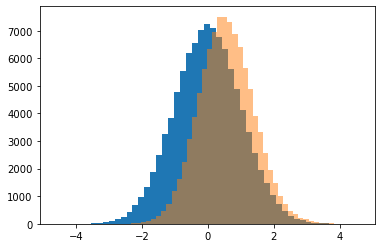

In [85]:
hist = plt.hist(mc, bins=50)
hist = plt.hist(mc2, bins=50, alpha=0.5)

In [86]:
np.mean(mc), np.std(mc)

(-0.005139325932546259, 1.0008204723753642)

In [3]:
scipy.stats.skewnorm(0.66, scale=1.5).interval(0.6827)

(-0.6864288456473889, 2.0050777211856503)

In [88]:
scipy.stats.skewnorm.std( 0.666, scale=1.5)

1.345315411228841

In [89]:
scipy.stats.skewnorm.mean( 0.666, scale=1.5)

0.66342026220954

In [6]:
scipy.stats.skewnorm.median( 0.666, scale=1.5)

0.6518074688618989

In [14]:
sk = scipy.stats.skewnorm(0.666, scale=1.5)
sk.moment(2)**(1/3)

1.3103706971183726

In [98]:
mc = scipy.stats.skewnorm(0.2, loc=0, scale=1).rvs(10000000)
scipy.stats.skewnorm.fit(mc)

(0.20393314588624645, -0.0033728122180240044, 1.0006202008924188)

## Multi-dimensional

In [ ]:
Non-central moment of order n#class multivariate_skew_normal():
#    def __init__(self, loc, sigplus, sigminus, corrmat):
#        self.loc = loc
#        self.corrmat = corrmat
#        self.skew = (sigplus-sigminus) / (sigplus+sigminus)
#        self.scale = (sigplus+sigminus) / 2
#
#    def logpdf(self, x):
#        if x.shape == (x.shape[0],):
#            y = (x-self.loc) / self.scale
#            dim = len(self.loc)
#            V = np.sum( (y-self.loc)*(y-self.loc) ) / dim
#            trace_term = dim*np.trace(np.linalg.inv(self.corrmat)*V)/2
#            skew_term = np.sum( np.log(2*scipy.stats.norm.cdf(self.skew*(y-self.loc)/self.scale)) )
#            return -dim*np.log(np.linalg.det(self.corrmat))/2 - trace_term + skew_term
#        
#    def pdf(self, x):
#        if x.shape == (x.shape[0],):
#            dim = len(self.loc)
#            V = np.sum( (x-self.loc)*(x-self.loc) ) / dim
#            skew_term = np.prod( 2*scipy.stats.norm.cdf(self.skew*(x-self.loc)/self.scale) )
#            return np.linalg.det(self.corrmat)**(-dim/2) * np.exp(-dim*np.trace(np.linalg.inv(self.corrmat)*V)/2) * skew_term
#            return np.exp(self.logpdf(x))
#
#        else:
#            dim = x.shape[1]
#            V = np.sum( (x-self.loc)*(x-self.loc), axis=1 ) / dim
#            trace_term = np.trace(np.repeat([np.linalg.inv(self.corrmat)], x.shape[0], axis=0) * V[:, np.newaxis, np.newaxis], axis1=1, axis2=2)
#            skew_term = np.prod( 2*scipy.stats.norm.cdf(self.skew*(x-self.loc)/self.scale), axis=1 )
#            return np.linalg.det(self.corrmat)**(-dim/2) * np.exp(-dim*trace_term/2) * skew_term

In [2]:
class multivariate_skew_normal():
    def __init__(self, loc, sigplus, sigminus, corrmat):
        loc = np.array(loc)
        sigplus = np.array(sigplus)
        sigminus = np.array(sigminus)
        corrmat = np.array(corrmat)
        self.loc = loc
        self.skew = (sigplus-sigminus) / (sigplus+sigminus)
        self.scale = np.diag( (sigplus+sigminus) / 2 )
        self.covmat = self.scale @ corrmat @ self.scale
        
    def pdf(self, x):
        x = np.array(x)
        multinorm = scipy.stats.multivariate_normal.pdf(x-self.loc, mean=np.zeros(len(x)), cov=self.covmat)
        cdf = scipy.stats.norm.cdf(self.skew@np.linalg.inv(self.scale)@(x-self.loc))
        return 2 * multinorm * cdf

In [3]:
loc = np.array([2,-1])
sigplus = np.array([2, 1])
sigminus = np.array([1, 4])
corrmat = np.array([[1, 0.5], [0.5, 1]])
a = multivariate_skew_normal(loc, sigplus, sigminus, corrmat)

In [5]:
a.pdf(np.array([1,1]))

0.17551344360943338

<a list of 6 text.Text objects>

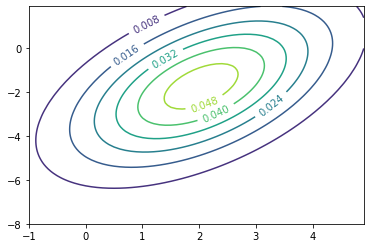

In [5]:
delta = 0.1
x = np.arange(-1.0, 5.0, delta)
y = np.arange(-8.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = [ a.pdf(np.array([X[i,j], Y[i,j]])) for i in range(X.shape[0]) for j in range(X.shape[1]) ]
Z = np.array(Z).reshape(X.shape)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
#ax.set_xlim(0,15)